<center>
<img src="https://file.mk.co.kr/meet/neds/2021/02/image_readtop_2021_169269_16138701304547187.jpeg" width="400" height="300"><br>이항
</center>




<center>
<img src="https://blog.kakaocdn.net/dn/cwdYzu/btqOt0qSp3y/3oIFbIojjZWDFHsEJnHNa0/img.jpg" width="400" height="400"><br>아마존
</center>



<center>
<img src="https://post-phinf.pstatic.net/MjAyMDAxMDdfMTYx/MDAxNTc4MzcyNzM2MzA2.1tCJDVAsfYGALRYM06AKj4JG2MJ0hDejJk3X2kGYskog.-BTVNSJJT2NuK69N-8l6AvsFmF6gIPgsFaxTCbR0vvwg.JPEG/%28%ED%98%84%EC%9E%A5%EC%82%AC%EC%A7%842%29_%ED%98%84%EB%8C%80%EC%B0%A8%2C_CES_2020%EC%97%90%EC%84%9C_%EC%9D%B8%EA%B0%84_%EC%A4%91%EC%8B%AC_%EB%AF%B8%EB%9E%98_%EB%AA%A8%EB%B9%8C%EB%A6%AC%ED%8B%B0_%EB%B9%84%EC%A0%84_%EA%B3%B5%EA%B0%9C.jpg?type=w1200" width="400" height="400"><br>현대자동차
</center>


# ehang  무엇을하는 기업이지? UAM (Urban air mobility) 도심항공교통

- 간략히 설명을 하자면 중국의 드론 업체이다. 요즘 드론은 한 두번은 보았을 것이다. 올림픽 개최식의 드론 혹은, 취미로 드론을 띄우는 사람, TV프로그램에서 멋진 풍경을 촬영 할때도 드론을 이용한다.


- 이항은 어떠한 드론을 만드는가 ?  중국의 이항은 사람이 타고 다니는 드론을 만든다. 그리고 이미 우리나라 서울에서는  이항의 'EH216모델'을 구입하였고 시범 운행을 선보였다. ( 사람은 타지 않았다고 한다...) 고층빌딩의 화재에도 사용할 수 있는 소방용드론과 함께 주력 사업이다.


- 도심항공교통 또는 UAM은 하늘을 이동 통로로 활용하는 미래의 도시 교통 체계이다. 우리나라 기업인 현대자동차, 한화시스템도 투자를 하고 있으며, 미국의 아마존 또한 마찬가지다. 테슬라의 일론 머스크도 관심을 가진바 있다. 










# ehang 이항주식 예측하기

#### 순서

- 주가데이터 받아오기

- 패키지 받아오기 

- 데이터 불러오기 

- 분석 및 데이터 전처리

- yahoo Finance API는 종류가 다양하며 각 API에서 제공하는 데이터도 조금씩 다르다. 시계열 데이터 부터, 기업 재무제표를 제공하는 API등 다양하게 있다.



In [375]:
#!pip3 install yfinance --user #yfinance라는 파이썬 패키지를 사용 및 설치

In [376]:
# 한글폰트
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


## Step1 탐색: 시간 정보가 포함된 데이터 살펴보기

- 주식이나 비트코인 시세처럼 연속적인 시간에 따라 다르게 측정되는 데이터를 시계열 데이터라 하며, 이를 분석하는 것을 '시계열 데이터 분석'이라고 한다. 시계열 데이터 분석은 심작 박동 데이터처럼 규칙적 시계열 데이터를 분석하는 것과 주식이나 비트코인 시세 예측처럼 불규칙적 시계열 데이터를 분석하는 것으로 구분할 수 있다.

In [482]:
# 이항 데이터셋의 기본 정보 구하기
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

eh_df = yf.download('EH', 
                      start='2019-02-01', 
                      end='2021-04-22', 
                      progress=False)

eh_df = eh_df[["Close"]]

eh_df = eh_df.reset_index()

eh_df.columns = ['day', 'price']

eh_df['day'] = pd.to_datetime(eh_df['day'])

eh_df.index = eh_df['day']
eh_df.set_index('day', inplace=True)

eh_df

,price
day,
2019-12-13,12.900000
2019-12-16,12.500000
2019-12-17,11.070000
2019-12-18,9.520000
2019-12-19,9.400000
...,...
2021-04-15,28.930000
2021-04-16,27.910000
2021-04-19,24.790001


In [436]:
eh_train_df = eh_df[:335]
eh_train_df

,price
day,
2019-12-13,12.900000
2019-12-16,12.500000
2019-12-17,11.070000
2019-12-18,9.520000
2019-12-19,9.400000
...,...
2021-04-08,34.070000
2021-04-09,34.340000
2021-04-12,29.200001


In [416]:
eh_test_df =eh_df[335:]
eh_test_df

,price
day,
2021-04-15,28.930000
2021-04-16,27.910000
2021-04-19,24.790001
2021-04-20,24.580000
2021-04-21,25.820000


In [480]:
# eh_df[['price']]
eh_df[eh_df['price'] < 60]
# print(eh_df.info())

,price
day,
2021-02-16,46.299999
2021-02-19,59.799999
2021-02-22,53.230000
2021-02-23,50.180000
2021-02-24,54.090000
2021-02-25,45.740002
2021-02-26,46.330002
2021-03-01,50.080002
2021-03-02,45.700001


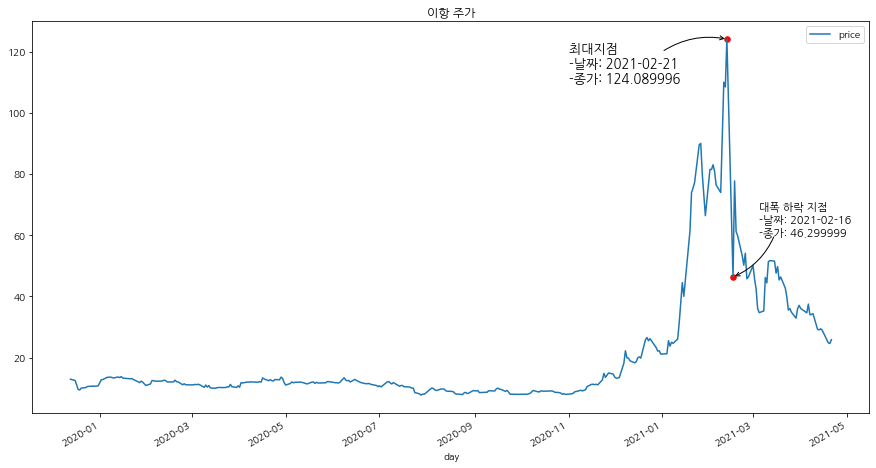

In [492]:
fig, ax = plt.subplots(figsize=(15, 8))
eh_df.plot(ax=ax)

# 4만 최저점
ax.annotate('', xy=('2021-02-12' ,124.089996), xytext=('2021-01-01', 120),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),
           )

plt.text('2020-11-01',110, "최대지점 \n-날짜: 2021-02-21 \n-종가: 124.089996",fontsize=13)

# 떡락시점
ax.annotate('', xy=('2021-02-16' ,46.299999), xytext=('2021-03-15', 60),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),
           )

plt.text('2021-03-05',60, "대폭 하락 지점 \n-날짜: 2021-02-16 \n-종가: 46.299999",fontsize=11)

# Scatter plot 추가
y1 = ['2021-02-12', '2021-02-16'] 
y2 = [124.089996, 46.299999]


plt.scatter(y1,y2,s=30,color='r')


plt.title("이항 주가")
plt.show()

In [381]:
# 이항 데이터셋의 기본 정보 구하기
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

eh_df = yf.download('EH', 
                      start='2019-01-01', 
                      end='2021-04-22', 
                      progress=False)


eh_df = eh_df.reset_index()

eh_df.columns = ['day', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

eh_df['day'] = pd.to_datetime(eh_df['day'])

eh_df.index = eh_df['day']
eh_df.set_index('day', inplace=True)

eh_df

,Open,High,Low,Close,Adj Close,Volume
day,,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000,290800
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000,157600
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000,221400
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000,403800
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000,325100
...,...,...,...,...,...,...
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,1632300
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,3947800
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,2979200


In [382]:
eh_df_vol = eh_df[["Volume"]]


eh_df_vol

,Volume
day,
2019-12-13,290800
2019-12-16,157600
2019-12-17,221400
2019-12-18,403800
2019-12-19,325100
...,...
2021-04-15,1632300
2021-04-16,3947800
2021-04-19,2979200


In [383]:
eh_df = eh_df[["Open", "High", "Low", "Close", "Adj Close"]]


eh_df

,Open,High,Low,Close,Adj Close
day,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000
...,...,...,...,...,...
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001


### 1. 주가 데이터 시각화

### 1) 기본 시각화

### 2) 캔들 차트를 사용한 시각화

In [384]:
from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt

#matplotlib에서 x축과 y축에 표시되는 값을 ticker라 함
import matplotlib.ticker as ticker 
import matplotlib.dates as mdates
import numpy as np

In [385]:
# !pip3 install mpl_finance      #mpi_finance 설치

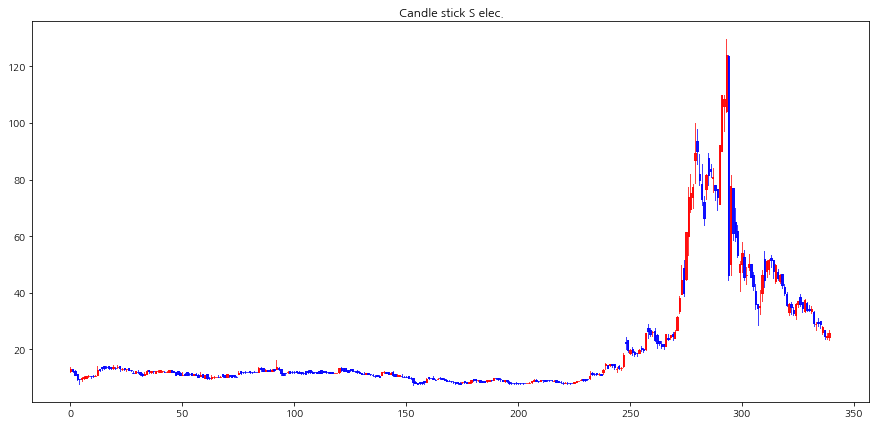

In [386]:
#차트와 피규어 그리기 준비 및 크기 설정
fig, ax = plt.subplots(figsize=(15,7)) 


# 시고저종 데이터를 통해 캔들 차트를 그리기 (순서를 반드시 시고저종으로 입력)
candlestick2_ohlc(ax,eh_df['Open'],eh_df['High'],eh_df['Low'],eh_df['Close'],width=0.6, colorup='r', colordown='b')


# 차트 타이틀 설정
plt.title('Candle stick S elec.')
plt.show()


- 캔들차트는 주식가격의 주요한 가격 정보를 담고 있습니다. 장 시작할 때의 가격인 시가, 장 중 최고 가격인 고가, 장 중 최저 가격인 저가, 장 마감 때 가격인 종가가 그것입니다. 


###  3) 봉차트

이제 적은기간으로 보기쉽게하기 위한 봉차트를 알아보자. 


 - 데이터 추출


In [387]:
# 데이터를 가져와 편리하게 다룰 수 있도록 PANDAS 패키지를 설치
#!pip3 install pandas_datareader

# 필요한 라이브러리 다운로드
from datetime import datetime 
import pandas_datareader.data as wb


start = datetime(2021,1,1) #시작날짜 
end = datetime(2021,3,2) #끝 날짜 
eh_df2 = yf.download('EH', start,end, progress=False)

- 시간포멧 보기좋게 바꾸는 방법

In [388]:
#날짜 포멧을 일, 또는 연-월-일로 바꾸기 
print(eh_df2.index[0])
print(eh_df2.index[0].strftime('%d'))
print(eh_df2.index[0].strftime('%Y-%m-%d'))

2021-01-04 00:00:00
04
2021-01-04


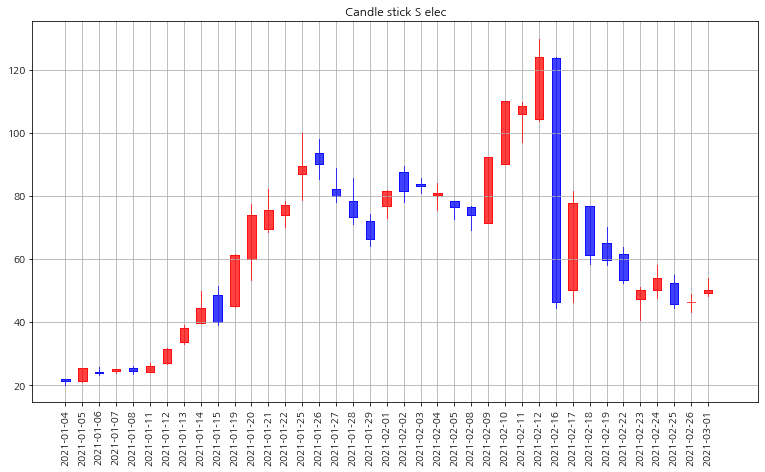

In [389]:
#다시 차트 그리기
fig, ax = plt.subplots(figsize=(13,7)) 

#x축의 눈금을 설정
day_list = []
name_list = []
for i, day in enumerate(eh_df2.index):    
    day_list.append(i) # 고정 축 list 생성
    name_list.append(day.strftime('%Y-%m-%d')) # 고정 축에 적힐 날짜 list 생성
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list)) #day_list를 받아서 리스트 안의 값의 위치에 고정 축 생성
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list)) #설정한 고정 축에 name_list 안의 값을 축에 출력

candlestick2_ohlc(ax,eh_df2['Open'],eh_df2['High'],eh_df2['Low'],eh_df2['Close'], width=0.5, colorup='r', colordown='b')

plt.xticks(rotation = 90) #x축 각도 회전
#fig.autofmt_xdate() #날짜 형식으로 자동 format 지정
plt.title('Candle stick S elec')
plt.grid()
plt.show()

In [390]:
print(eh_df.shape)
print(eh_df.info())
eh_df.tail()

(340, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2019-12-13 to 2021-04-21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       340 non-null    float64
 1   High       340 non-null    float64
 2   Low        340 non-null    float64
 3   Close      340 non-null    float64
 4   Adj Close  340 non-null    float64
dtypes: float64(5)
memory usage: 15.9 KB
None


,Open,High,Low,Close,Adj Close
day,,,,,
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001
2021-04-20,24.219999,25.879999,23.600000,24.580000,24.580000
2021-04-21,24.260000,26.680000,23.309999,25.820000,25.820000



- Open: 시가
- High: 고가
- Low: 저가
- Close: 종가
- Adj Close: 수정 종가
- Volume: 거래량
- tomorrow Adj Close: 다음날 종가
- Fluctuation: 변동
- Fluctuation Rate: 변동률
- Price: 가격

### 2. 데이터확인

-  att확인

In [391]:
eh_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

- High: 고가 
- Low: 저가
- Open: 시가 
- Close: 종가
- Volume: 거래량
- Adj Close: 수정 종가

- type확인

In [392]:
eh_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

- describe() 메소드로 기본정보 확인

In [393]:
eh_df.describe()

,Open,High,Low,Close,Adj Close
count,340.000000,340.000000,340.000000,340.000000,340.000000
mean,20.289003,21.525779,18.815729,20.158100,20.158100
std,19.676354,21.758806,17.447580,19.728020,19.728020
min,7.980000,8.035000,7.590000,7.700000,7.700000
25%,10.007500,10.530000,9.707500,10.037500,10.037500
50%,12.035000,12.300000,11.535000,11.910000,11.910000
75%,20.313499,21.280001,19.251250,19.962499,19.962499
max,123.497002,129.800003,103.800003,124.089996,124.089996


컬럼별로 데이터의 개수(count), 데이터의 평균값(mean), 표준 편차(std), 최솟값(min), 4분위수(25%, 50%, 75%), 그리고 최댓값(max)들의 정보 확인

### 3.이동평균선 계산해서 att추가하기

(1) 종가를 이용한 이동평균선 계산, 추가

-  이동평균선은 주식값 예측에 중요한 역할을 한다고 한다. 

- 단기이동평균선이 장기이동평균선을 넘으면 "골든크로스"라고 한다. 
 (최근 주식값이 예전꺼보다 높다 로 해석할수있다. 곧,  주식이 오르고 있다.)

In [394]:
# maN : N일전부터 현재까지의 수정종가 평균
ma5 = eh_df['Adj Close'].rolling(window=5).mean()
ma20 = eh_df['Adj Close'].rolling(window=20).mean()
ma60 = eh_df['Adj Close'].rolling(window=60).mean()
ma120 = eh_df['Adj Close'].rolling(window=120).mean()

#새로운 데이터를 삽입하는 코드
eh_df.insert(len(eh_df.columns), "MA5", ma5)
eh_df.insert(len(eh_df.columns), "MA20", ma20)
eh_df.insert(len(eh_df.columns), "MA60", ma60)
eh_df.insert(len(eh_df.columns), "MA120", ma120)

(2) 거래량을 이용한 이동평균선 계산, 추가  

In [395]:
vma5 = eh_df_vol['Volume'].rolling(window=5).mean()       
eh_df_vol.insert(len(eh_df_vol.columns), "VMA5", vma5)   

ma5, ma20, ma60, ma120 변수를 만들어 이미 갖고 있는 데이터들을 이용해 새로운 결과값을 산출한 다음

dataframe에 insert()함수를 사용하여 이 새로운 데이터들을 열(column)로 추가할 수 있다.

- rolling()함수 : 동일한 사이즈만큼 옆으로 이동하면서 연산하는 함수이다.







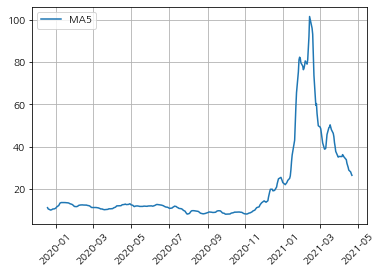

In [396]:
#이동평균값 plot 그리기
plt.plot(eh_df.index,eh_df['MA5'], label="MA5")
plt.legend(loc='best') #라벨 위치 설정
plt.xticks(rotation=45) #x축 좌표각도
plt.grid() #격자
plt.show() #현재까지 그려진 그래프 보여주기

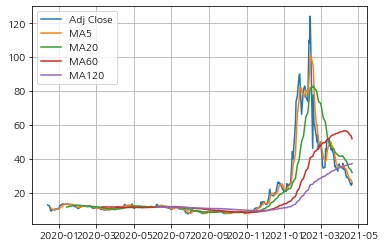

In [397]:
#차트에 표현할 요소 설정
plt.plot(eh_df['Adj Close'], label="Adj Close")
plt.plot(eh_df['MA5'], label="MA5")
plt.plot(eh_df['MA20'], label="MA20")
plt.plot(eh_df['MA60'], label="MA60")
plt.plot(eh_df['MA120'], label="MA120")

#'best'를 인자로 주어 가장 적절한 자리에 위치하게 함
plt.legend(loc='best')

#격자 그리기
plt.grid()
plt.show()

### 4.주가변동율 추가 및 시각화

#### (1)변동율 추가

In [398]:
# x일 행에 x+1일의 종가를 추가
eh_df['tomorrow Adj Close']= eh_df['Adj Close'].shift(-1)

# 변동율 측정 => ((다음날종가)-(오늘종가))/오늘종가 
eh_df['Fluctuation']= eh_df['tomorrow Adj Close']-eh_df['Adj Close']
eh_df['Fluctuation Rate']= eh_df['Fluctuation']/eh_df['Adj Close']
eh_df['price']= eh_df['Adj Close']
eh_df

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000,NaN,NaN,NaN,NaN,12.500000,-0.400000,-0.031008,12.900000
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000,NaN,NaN,NaN,NaN,11.070000,-1.430000,-0.114400,12.500000
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000,NaN,NaN,NaN,NaN,9.520000,-1.549999,-0.140018,11.070000
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000,NaN,NaN,NaN,NaN,9.400000,-0.120001,-0.012605,9.520000
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000,11.078,NaN,NaN,NaN,10.000000,0.600000,0.063830,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,30.178,35.6690,55.532833,36.749958,27.910000,-1.020000,-0.035258,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,28.892,34.7975,54.766333,36.907875,24.790001,-3.119999,-0.111788,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,28.010,33.7215,53.923000,37.042375,24.580000,-0.210001,-0.008471,24.790001


- 추가로 먼저 Train/Test set으로 나눌것인데 마지막 날짜 5일을 제외한 나머지를 Train으로 지정 해주고 마지막 날짜 5일을 Test으로 지정 해주었다.

In [399]:
eh_train_df = eh_df[:335]
eh_train_df

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000,NaN,NaN,NaN,NaN,12.500000,-0.400000,-0.031008,12.900000
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000,NaN,NaN,NaN,NaN,11.070000,-1.430000,-0.114400,12.500000
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000,NaN,NaN,NaN,NaN,9.520000,-1.549999,-0.140018,11.070000
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000,NaN,NaN,NaN,NaN,9.400000,-0.120001,-0.012605,9.520000
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000,11.078000,NaN,NaN,NaN,10.000000,0.600000,0.063830,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08,34.220001,35.750000,33.599998,34.070000,34.070000,35.230000,40.7140,56.605167,35.868958,34.340000,0.270000,0.007925,34.070000
2021-04-09,33.500000,35.480000,32.810001,34.340000,34.340000,34.889999,39.8660,56.654167,36.079958,29.200001,-5.139999,-0.149680,34.340000
2021-04-12,33.130001,33.400002,28.100000,29.200001,29.200001,33.810000,38.7415,56.507833,36.248458,29.020000,-0.180000,-0.006164,29.200001


In [400]:
eh_test_df = eh_df[335:]
eh_test_df

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,30.178,35.6690,55.532833,36.749958,27.910000,-1.020000,-0.035258,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,28.892,34.7975,54.766333,36.907875,24.790001,-3.119999,-0.111788,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,28.010,33.7215,53.923000,37.042375,24.580000,-0.210001,-0.008471,24.790001
2021-04-20,24.219999,25.879999,23.600000,24.580000,24.580000,27.122,32.8160,53.046000,37.176125,25.820000,1.240000,0.050448,24.580000
2021-04-21,24.260000,26.680000,23.309999,25.820000,25.820000,26.406,32.1170,51.984167,37.321625,NaN,NaN,NaN,25.820000


#### (2) 추가한 데이터로 시각화 

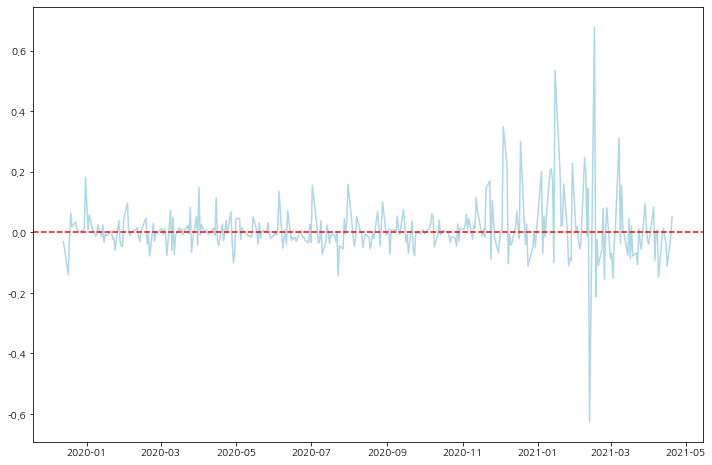

In [401]:
plt.figure(figsize=(12,8)) 
plt.plot(eh_df.index,eh_df['Fluctuation Rate'], color = 'lightblue')
plt.axhline( y = 0, color = 'red', ls = '--') #기준선추가 , axhline() 함수의 첫번째 인자는 y 값으로서 수평선의 위치가 된다.
plt.show()

#### 이항 주식의 변동률 원인 (2020-12-01 ~ 2021-03-01)

이항주식의 경우 올해 ( 21년 2월 ) 엄청난 변동율 그래프가 있을것을 나는 알고 해본 것이지만 지금 시각화로만든 그래프가 경이롭다. 추가로 - 124달러 -> 46달러 -> 77달러 .. 엄청난 변동율이다.

In [402]:
eh_train_df

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000,NaN,NaN,NaN,NaN,12.500000,-0.400000,-0.031008,12.900000
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000,NaN,NaN,NaN,NaN,11.070000,-1.430000,-0.114400,12.500000
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000,NaN,NaN,NaN,NaN,9.520000,-1.549999,-0.140018,11.070000
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000,NaN,NaN,NaN,NaN,9.400000,-0.120001,-0.012605,9.520000
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000,11.078000,NaN,NaN,NaN,10.000000,0.600000,0.063830,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08,34.220001,35.750000,33.599998,34.070000,34.070000,35.230000,40.7140,56.605167,35.868958,34.340000,0.270000,0.007925,34.070000
2021-04-09,33.500000,35.480000,32.810001,34.340000,34.340000,34.889999,39.8660,56.654167,36.079958,29.200001,-5.139999,-0.149680,34.340000
2021-04-12,33.130001,33.400002,28.100000,29.200001,29.200001,33.810000,38.7415,56.507833,36.248458,29.020000,-0.180000,-0.006164,29.200001


In [403]:
eh_test_df

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,30.178,35.6690,55.532833,36.749958,27.910000,-1.020000,-0.035258,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,28.892,34.7975,54.766333,36.907875,24.790001,-3.119999,-0.111788,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,28.010,33.7215,53.923000,37.042375,24.580000,-0.210001,-0.008471,24.790001
2021-04-20,24.219999,25.879999,23.600000,24.580000,24.580000,27.122,32.8160,53.046000,37.176125,25.820000,1.240000,0.050448,24.580000
2021-04-21,24.260000,26.680000,23.309999,25.820000,25.820000,26.406,32.1170,51.984167,37.321625,NaN,NaN,NaN,25.820000


## Step2예측: ARIMA 예측 모델

ARIMA는 전통적인 시계열 예측 방법으로 크게 두 가지 개념을 포함하고 있다. 첫 번째는 AR(Autoregression)모델로 자기 자신의 과거를 정보로 사용하는 개념이다. 이는 '현재의 상태는 이전의 상태를 참고해서 계산된다.'라는 아이디어를 전제로 한다. 두 번째 개념은 MA(Moving Average)모델로 '이전 항에서의 오차를 이용하여 현재 항의 상태를 추론 하겠다'라는 방법이다. 그리고 이 둘은 합친 것을 ARMA 모델이라고 하며, 조금 더 나아간 ARIMA모델은 ARMA 모델에 추세 변동의 경향성 까지 반영한 방법이다. 파이썬에서는 statsmodule 모듈로 ARIMA 분석을 수행할 수 있다. 다음 코드는 ARIMA 분석의 실행 과정이다. ARIMA 클래스에 order=(2,1,2)라고 입력되어진 파라미터는 'AR이 몇 번째 과거까지를 바라보는지에 대한 파라미터(2),차분(Difference)에 대한 파라미터(1), MA가 몇 번째 과거가지를 바라보는지에 대한 파라미터(2)'를 의미하는 것이다. 차분이란 현재 상태의 변수에서 바로 전 상태의 변수를 빼주는 것을 의미하며, 시계열 데이터의 불규칙성을 조금이나마 보정해주는 역할을 한다. 또한 앞서 말한 ARIMA 모델의 경향성의 의미한다. 이제 아래의 실행 결과를 분석해보자. 실행 결과의 표를 살펴보면 상수항을 제외한 모든 계수의 p-value가 0.05 이하로 유의미한 것으로 나타난다. 이것은 AR과 MA 모두 2로 설정하는 것이 꽤나 의미 있는 분석 결과를 도출한다는 것이다.


In [404]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(eh_train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())


/home/ubuntu/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1020.718
Method:                       css-mle   S.D. of innovations              5.125
Date:                Sat, 24 Apr 2021   AIC                           2053.437
Time:                        13:52:22   BIC                           2076.304
Sample:                             1   HQIC                          2062.554
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0909      0.062      1.476      0.140      -0.030       0.212
ar.L1.D.y      0.3981      0.104      3.820      0.000       0.194       0.602
ar.L2.D.y      0.5559      0.099      5.636      0.0

/home/ubuntu/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


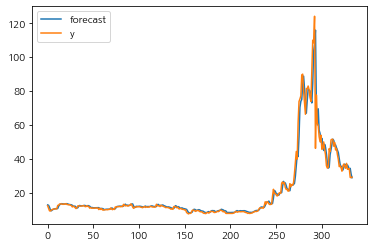

In [405]:
# 학습 데이터에 대한 예측 결과
fig = model_fit.plot_predict()

<AxesSubplot:>

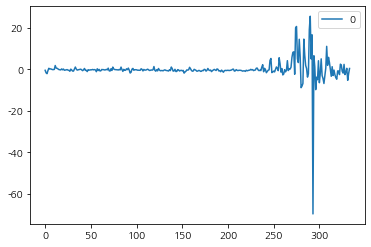

In [406]:
# 잔차의 변동을 시각화
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

### 이항주가의 변동률과, ARIMA 모델의 잔차 그래프

다음의 그래프를 보자. 이항의 주가 번동률 그래프와,ARIMA 모델의 잔차 그래프를 각각 하나씩 나타낸 결과이다. 먼저 이항의 주가 변동률을 보면 약 2020년 12월 부터 급격하게 상승하다가 갑자기 하락하는 경향을 보이는데, ARIMA 모델의 잔차 그래프 역시 이항의 주가변동률과 같은 경향을 보인다.

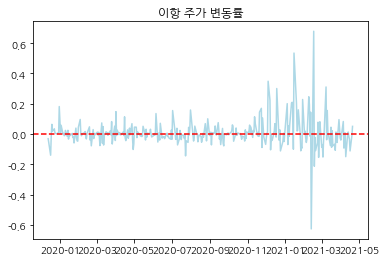

Text(0.5, 1.0, 'ARIMA 모델의 잔차 그래프')

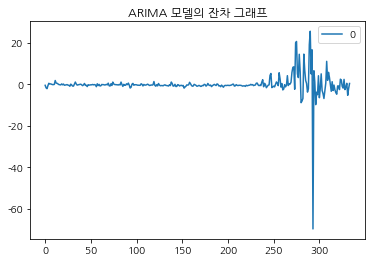

In [407]:
# plt.figure(figsize=(12,8)) 
plt.plot(eh_df.index,eh_df['Fluctuation Rate'], color = 'lightblue')
plt.axhline( y = 0, color = 'red', ls = '--') #기준선추가 , axhline() 함수의 첫번째 인자는 y 값으로서 수평선의 위치가 됩니다.
plt.title('이항 주가 변동률')
plt.show()

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA 모델의 잔차 그래프')

### ARIMA 모델 평가

이번에는 ARIMA 모델을 평가해보자. 모델을 평가하기 위해서는 테스트 전용 데이터가 필요한데, 이번에는 5일 동안의 미래를 테스트 데이터로 사용해보자. 불규칙적 시계열 예측의 경우에는 먼 미래를 예측하는 것의 큰 의미가 없기 때문에 '앞으로 N일동안 어느정도로 상승/하락할 것이다'정도의 대략적인 경향 예측만을 수행하는 것이 일반적이기 때문이다. 모델의 평가 과정은 다음과 같다.

 - model_fit.forecast(steps = 5)로 향후 5일의 가격을 예측하요 pred_y로 정의 한다. 
 - eh_df.iloc[361:]로 해주어 eh_df의 마지막 5일을 test_y로 정의 한다.
 - 모델의 예측한 상한값, 하한값을 pred_y_upper, pred_y_lower로 정의 한다.
 - 정의한 모든 값을 비교하여 5일동안의 상승 경향 예측이 얼마나 맞는지 평가 해본다.

In [408]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터넷으로부터 5일 뒤를 예측한다.

eh_test_df

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate,price
day,,,,,,,,,,,,,
2021-04-15,30.129999,30.129999,27.600000,28.930000,28.930000,30.178,35.6690,55.532833,36.749958,27.910000,-1.020000,-0.035258,28.930000
2021-04-16,26.010000,28.350000,25.520000,27.910000,27.910000,28.892,34.7975,54.766333,36.907875,24.790001,-3.119999,-0.111788,27.910000
2021-04-19,26.680000,26.730000,23.771999,24.790001,24.790001,28.010,33.7215,53.923000,37.042375,24.580000,-0.210001,-0.008471,24.790001
2021-04-20,24.219999,25.879999,23.600000,24.580000,24.580000,27.122,32.8160,53.046000,37.176125,25.820000,1.240000,0.050448,24.580000
2021-04-21,24.260000,26.680000,23.309999,25.820000,25.820000,26.406,32.1170,51.984167,37.321625,NaN,NaN,NaN,25.820000


In [409]:
# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-21)
pred_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-21)
test_y = eh_test_df.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

그리고 다음 코드는 이를 그래프로 시각화 한 것이다. 파란색 그래프는 모델이 예상한 최고 가격, 즉 상한가의 그래프이다. 그리고 빨간색은 모델이 예측한 하한가 그래프이고, 초록색은 실제 5일간의 가격 그래프, 노란색은 모델이 예측한 가격 그래프를 나타낸 것이다.

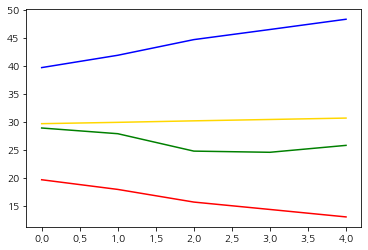

In [410]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

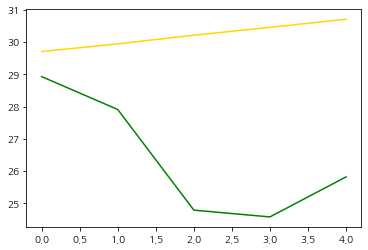

In [411]:
plt.plot(pred_y, color = "gold") # 모델이 예상한 가격 그래프
plt.plot(test_y, color = "green") # 실제 가격 그래프

- 이번에는 상한가와 하한가를 제외한 뒤, 그래프를 살펴보자. 그래프의 상승 경향을 살펴보면 그다지 좋지 않은 예측을 한 것으로 보인다. 하지만 '5일 동안 상승할 것이다'라는 아주 큰 트렌드 정도는 예측할 수 있어보인다.

### Facebook Prophet

이번에는 ARIMA보다 조금 더 정확한 트렌드 예측 분석을 제공하는 라이브러리 'Facebook Prophet'을 사용해보자. Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측모델로, 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있다. 
fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피처를 'ds'와 'y'로 변경해야 한다. 그리고 Prophet이라는 클래스를 선언한 뒤, fit()함수로 모델을 학습시킨다. 모델 생성에 포함되는 파라미터의 의미는 다음과 같다.

- seasonality_mode : 연간,월간,주간,일간 등의 트렌드성을 반영하는 것의 의미하는 파라미터이다.
- changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터이다. 수치가 높을수록 모델은 과적합에 가까워 진다.

- Facebook Prophet 활용하기

In [412]:
#!pip3 install Prophet 

In [413]:
from fbprophet import Prophet


eh_df = eh_df.reset_index()

eh_df.columns = ['ds', 'y']

eh_train_df = eh_df[:335]
eh_test_df = seh_df[335:]



ValueError: Length mismatch: Expected axis has 14 elements, new values have 2 elements

### 총평

위에 그래프 ( **6-3 봉차트,적은기간보기쉽게**) 를 보자. 이것을 보기 위해 이번 블로깅을 했다고 보면 된다. 위에 **4-2 주가변동율 추가 및 시각화변동율그래프**로 예상은 했지만, 어느 정확한 날짜에 변동률이 컸는지는 알 수 없었다. 하지만 봉차트로는 날짜와 변동율을 직관적으로 볼 수 있었다. 다음 블로깅은  이항 주식 데이터 분석 - 예측하기를 해보려 한다.

---

#### Reference

- 블로그
    - [Chapter 3.2 비트코인 시세 예측하기 again 2018](https://seethefuture.tistory.com/52)
    - [1. 삼성전자 주식데이터 분석 - 분석하기](https://sosoeasy.tistory.com/332)
- 뉴스
    - [21.02.17 공매도 리포트에 주가 63% 폭락](https://biz.chosun.com/site/data/html_dir/2021/02/17/2021021700991.html?utm_source=naver&utm_medium=original&utm_campaign=biz)
    - [21.02.18 이항 주가 하루 만에 67% 급반등…롤러코스터 탄 서학개미](https://www.mbn.co.kr/news/economy/4427097)